
# Muhammad Ghulamzaki


# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score

In [7]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [9]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


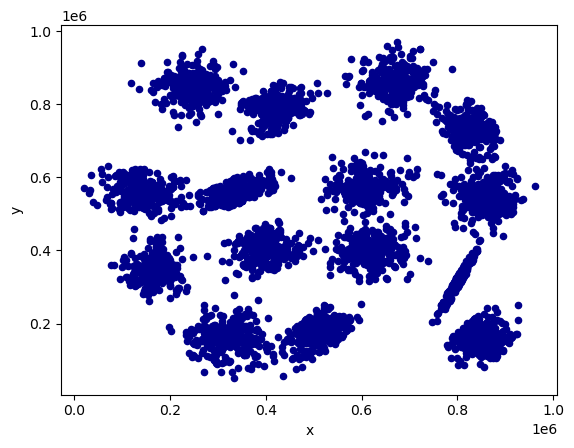

In [10]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [12]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#Import Library
from sklearn.cluster import KMeans
from sklearn import metrics
from warnings import filterwarnings as fw; fw('ignore')

#START CODE
inertia = []

for k in range(10, 25):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertia.append(model.inertia_)
inertia
#END CODE

[35532091779199.11,
 28620286651244.28,
 23983150459644.906,
 19313796248327.113,
 13486768156952.316,
 8917615616867.254,
 8657492058492.084,
 8415708677005.239,
 8192983107761.101,
 8055069001365.688,
 7817801780615.135,
 7555981813809.688,
 7376500497435.548,
 7211126077136.613,
 7065324546587.046]

In [14]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
best_K = 15
kmeans = KMeans(n_clusters=best_K, random_state=0)
label = kmeans.fit_predict(data)
#END CODE

score = silhouette_score(data, label)
print("Silhouette Score =", score)

Silhouette Score = 0.711278614093076


### Proses Visualisasi hasil CLuster

In [15]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data
result = data.copy()

#START CODE
result['cluster'] = label
result.head()
#END CODE

,x,y,cluster
0,664159,550946,8
1,665845,557965,8
2,597173,575538,8
3,618600,551446,8
4,635690,608046,8


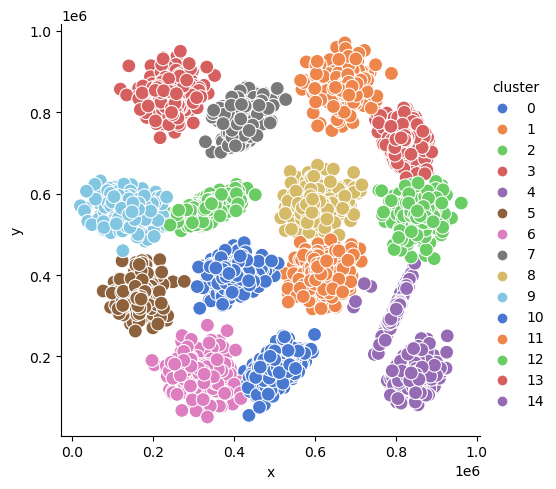

<Figure size 800x600 with 0 Axes>

In [16]:
#Lakukan Plotting terhadap data
import seaborn as sns
import matplotlib.pyplot as plt

#START CODE

#Membuat scatter plot
sns.relplot(x='x', y='y', hue='cluster', data=result, palette='muted', s=100)
plt.figure(figsize=(8, 6))
plt.show()
#END CODE